Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость.
Визуализировать дерево решений.
Написать вывод.
Не копировать бездумно чужие работы.


**Ответить на вопросы (обоснованно).**

1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
2. Как влияет пол/возраст/номер палубы.

In [1]:
import pandas as pd
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
train_titanic=files.upload()

Saving titanic_train.csv to titanic_train.csv


In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


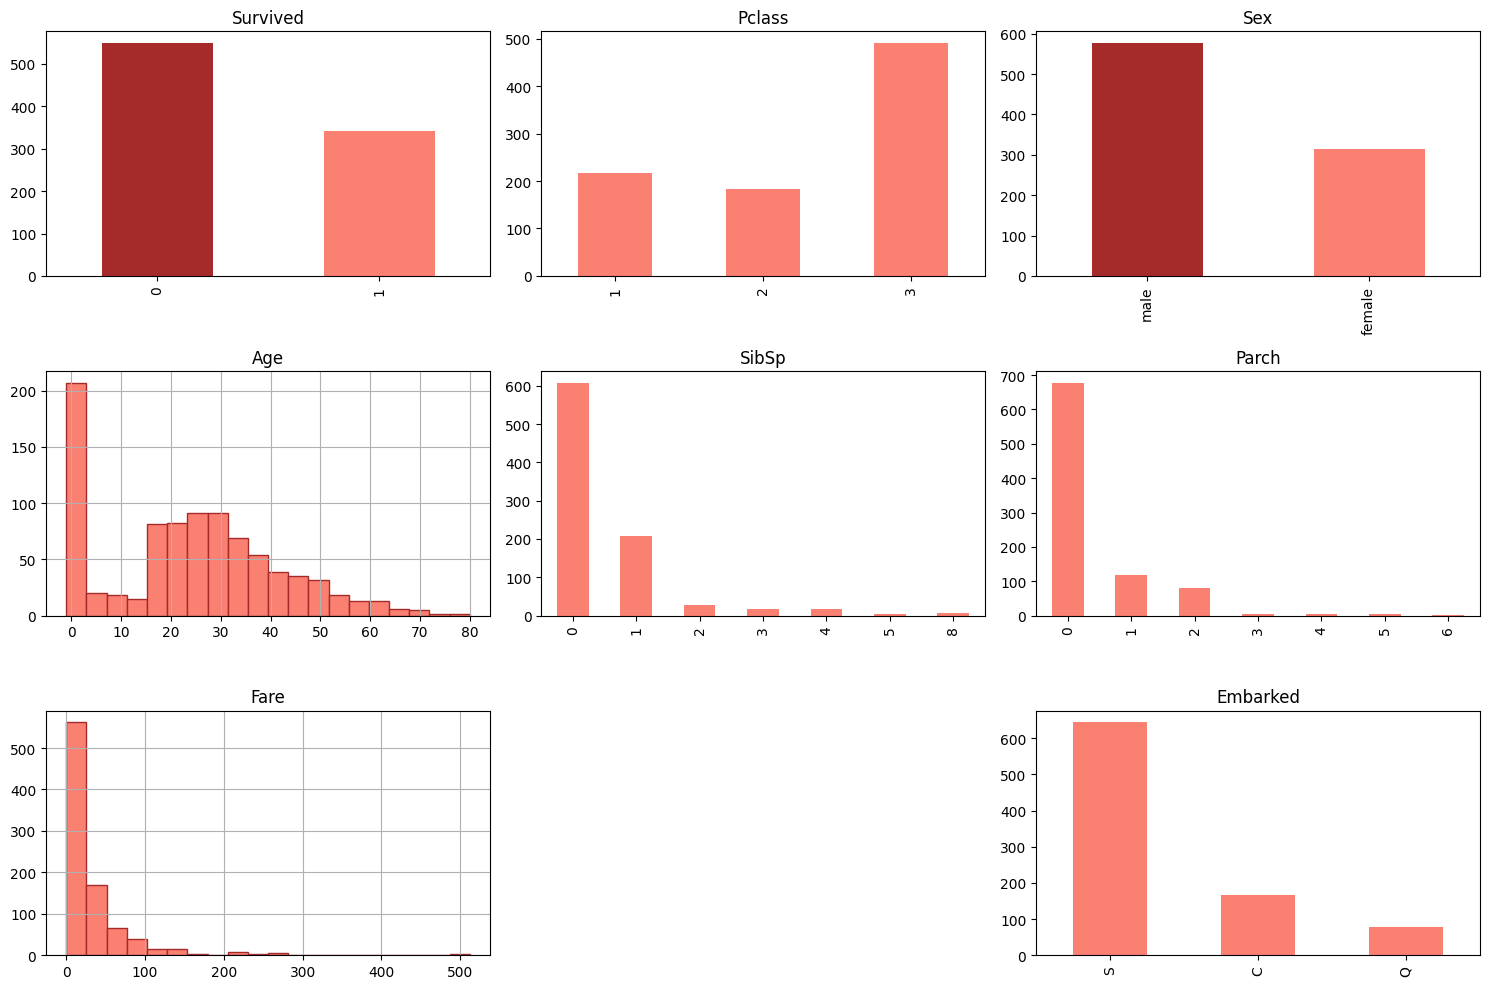

In [124]:
# Устанавливаем размер графиков
plt.figure(figsize=(15, 10))

# Гистограмма для столбца 'Survived'
plt.subplot(3, 3, 1)
df['Survived'].value_counts().plot(kind='bar', color=['brown', 'salmon'])
plt.title('Survived')

# Гистограмма для столбца 'Pclass'
plt.subplot(3, 3, 2)
df['Pclass'].value_counts().sort_index().plot(kind='bar', color=['salmon'])
plt.title('Pclass')

# Гистограмма для столбца 'Sex'
plt.subplot(3, 3, 3)
df['Sex'].value_counts().plot(kind='bar', color=['brown', 'salmon'])
plt.title('Sex')

# Гистограмма для столбца 'Age'
plt.subplot(3, 3, 4)
df['Age'].hist(bins=20, color='salmon', edgecolor='brown')
plt.title('Age')

# Гистограмма для столбца 'SibSp'
plt.subplot(3, 3, 5)
df['SibSp'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('SibSp')

# Гистограмма для столбца 'Parch'
plt.subplot(3, 3, 6)
df['Parch'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Parch')

# Гистограмма для столбца 'Fare'
plt.subplot(3, 3, 7)
df['Fare'].hist(bins=20, color='salmon', edgecolor='brown')
plt.title('Fare')

# Гистограмма для столбца 'Embarked'
plt.subplot(3, 3, 9)
df['Embarked'].value_counts().plot(kind='bar', color=['salmon'])
plt.title('Embarked')

# Регулировка расстояний между графиками
plt.tight_layout()


plt.show()


In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#процент пропусков в каждом столбце
for col in df.columns:
    print(f'{col}: {df[col].isna().sum() / df.shape[0] * 100:.1f}')

PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 19.9
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 77.1
Embarked: 0.2


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# Проверка, есть ли строки, в которых все ячейки пустые
empty_rows = df.isnull().all(axis=1)
print(empty_rows.sum())

0


In [14]:
# Рассчет корреляции Пирсона
correlation_matrix = df.corr(method='pearson')

# Вывод матрицы корреляции
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-14-c837aa6d0f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


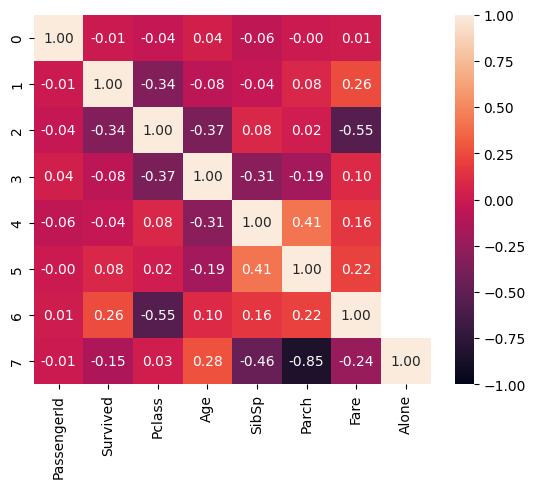

In [24]:
# Построение тепловой карты
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f")
#annot=True аннотации с числовыми значениями, fmt=".2f" форматирует числа с двумя знаками после запятой

plt.show()

***Промежуточный вывод***
По матрице корреляции можно заметить следующие зависимости:
- с ростом Pclass снижается Survived - то есть чем больше цифра класса (так как 1 это высший класс) тем ниже выживаемость
- возрасть на выживаемость не влияет
- так же есть зависимость что чем выше класс тем он дороже, можно рассматривать один из этих столбцов для обучения модели


In [25]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Alone            0
dtype: int64

In [26]:
# Добавление столбца 'alone'
df['Alone'] = df['Parch'].apply(lambda x: 0 if x != 0 else 1)

In [27]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [28]:
# Построение тепловой карты с новым столбцом Alone
correlation_with_Alone = df.corr()['Alone']

# Добавляем результаты в корреляционную матрицу
correlation_matrix = correlation_matrix.append(correlation_with_Alone, ignore_index=True)

# Выводим итоговую корреляционную матрицу
print(correlation_matrix)

   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658   
1    -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
2    -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
3     0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
4    -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
5    -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
6     0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
7    -0.005167 -0.147408  0.027526  0.280626 -0.462241 -0.845092 -0.237717   
8    -0.005167 -0.147408  0.027526  0.280626 -0.462241 -0.845092 -0.237717   

   Alone  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    1.0  
8    1.0  


<ipython-input-28-d42ab16a4b29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_Alone = df.corr()['Alone']
<ipython-input-28-d42ab16a4b29>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_matrix = correlation_matrix.append(correlation_with_Alone, ignore_index=True)


In [29]:
df.groupby('Alone').Survived.value_counts()

Alone  Survived
0      1           109
       0           104
1      0           445
       1           233
Name: Survived, dtype: int64

In [22]:
# Рассчитываем процент одиноких и семейных людей
alone_counts = df['Alone'].value_counts()

percentages = alone_counts / len(df) * 100

# Выводим результат
print("Соотношение одиноких и семейных людей на титанике, где 1 - одинок, 0 - есть семья")
print(percentages)

Соотношение одиноких и семейных людей на титанике, где 1 - одинок, 0 - есть семья
1    76.094276
0    23.905724
Name: Alone, dtype: float64


In [35]:
# Рассчитаем % от общего числа пассажиров в зависимости от того был пассажир одинок на титанике или нет
total_passengers = len(df)

result = df.groupby(['Alone', 'Survived']).size().unstack(fill_value=0)

# Рассчитываем проценты от общего числа пассажиров
result_percentages = result.div(total_passengers) * 100

# Переименовываем столбцы
result_percentages.columns = ['Not Survived (%)', 'Survived (%)']

# Выводим результат
print(result_percentages)

       Not Survived (%)  Survived (%)
Alone                                
0             11.672278     12.233446
1             49.943883     26.150393


**Вывод:** по этим данными видно что процент выжить на титанике выше если человек одинок, но это немного не верно, так как в целом на титанике было больше одиноких людей чем семейных

---



In [36]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

**Вывод:** чем выше класс каюты, тем больше шансов на выживание

In [37]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

**Вывод:** если женский пол, то шансов выжить больше

In [39]:
# Преобразование категориального признака 'Sex' в числовые с использованием LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Sex'])

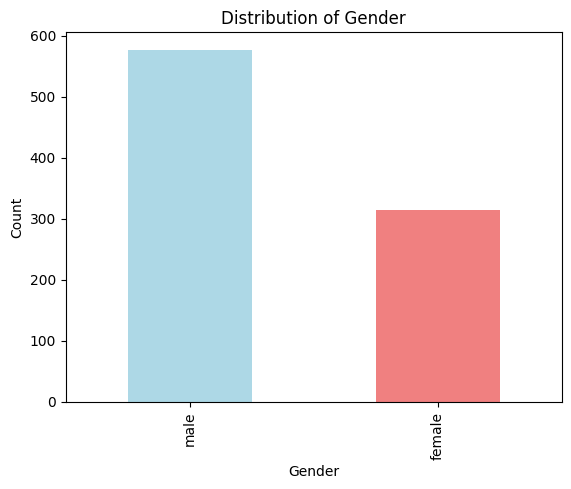

In [47]:
# Построим график распределения гендеров на в train датасете
sex_distribution = df['Sex'].value_counts()

sex_distribution.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Добавление заголовка и меток
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Отображение графика
plt.show()

In [51]:
# Посмотрик как влияет пара 'Sex', 'Alone' на выживаемость на титанике
cross_table = pd.crosstab(index=df['Survived'], columns=[df['Alone'], df['Sex']], margins=True, margins_name='Total')
print(cross_table)

Alone         0           1      Total
Sex      female male female male      
Survived                              
0            40   64     41  404   549
1            80   29    153   80   342
Total       120   93    194  484   891


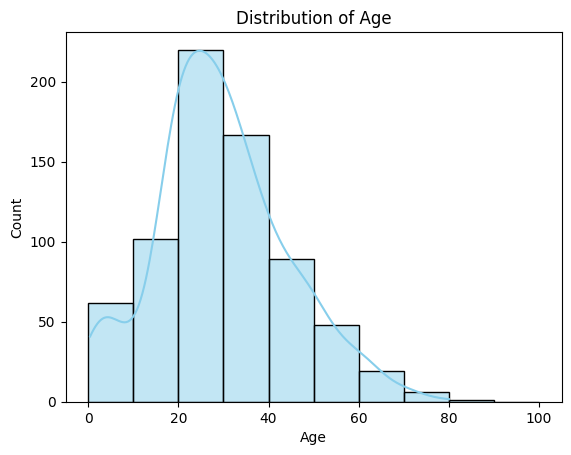

In [50]:
# Построим график распределения возрастов на в train датасете
sns.histplot(data=df, x='Age', bins=range(0, 110, 10), kde=True, color='skyblue')

# Добавление заголовка и меток
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Отображение графика
plt.show()

In [55]:
# Посмотрик как влияет пара 'Sex', 'Age' на выживаемость на титанике
df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 110, 10), right=False)
cross_table = pd.crosstab(index=df['Survived'], columns=[df['Age_Group'], df['Sex']], margins=True, margins_name='Total')
print(cross_table)

Age_Group [0, 10)      [10, 20)      [20, 30)      [30, 40)      [40, 50)  \
Sex        female male   female male   female male   female male   female   
Survived                                                                    
0              11   13       11   50       20  123       10   84       10   
1              19   19       34    7       52   25       50   23       22   
Total          30   32       45   57       72  148       60  107       32   

Age_Group      [50, 60)      [60, 70)      [70, 80) [80, 90) Total  
Sex       male   female male   female male     male     male        
Survived                                                            
0           45        2   26        0   13        6        0   424  
1           12       16    4        4    2        0        1   290  
Total       57       18   30        4   15        6        1   714  


In [59]:
# Посмотрик как влияет пара 'Sex', 'SibSp' на выживаемость на титанике
cross_table = pd.crosstab(index=df['Survived'], columns=[df['SibSp'], df['Sex']], margins=True, margins_name='Total')
print(cross_table)

SibSp         0           1           2           3           4           5  \
Sex      female male female male female male female male female male female   
Survived                                                                      
0            37  361     26   71      3   12      7    5      4   11      1   
1           137   73     80   32     10    3      4    0      2    1      0   
Total       174  434    106  103     13   15     11    5      6   12      1   

SibSp              8      Total  
Sex      male female male        
Survived                         
0           4      3    4   549  
1           0      0    0   342  
Total       4      3    4   891  


**Вывод:** чем меньше семья тем боле шансов выжить

In [62]:
#Заполнение пропусков в столбце 'Age'
df['Age']=df['Age'].fillna(-1)

**Вывод:** Больше всего спаслось одиноких женщин

In [95]:
X = df[['Age', 'Pclass', 'Gender', 'Alone']]
Y = df['Survived'] #целевая переменная

In [96]:
# Инициализация и обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X, Y)


DecisionTreeClassifier(random_state=42)

In [97]:
test_titanic_uploaded=files.upload()

Saving titanic_test.csv to titanic_test (2).csv


In [98]:
df_test=pd.read_csv('titanic_test.csv')

In [99]:
df_test.shape

(418, 11)

In [100]:
# Добавление столбца 'alone'
df_test['Alone'] = df_test['Parch'].apply(lambda x: 0 if x != 0 else 1)

In [101]:
label_encoder = LabelEncoder()
df_test['Gender'] = label_encoder.fit_transform(df_test['Sex'])

In [102]:
#Заполнение пропусков в столбце 'Age'
df_test['Age']=df_test['Age'].fillna(-1)

In [103]:
X_test = df_test[['Age', 'Pclass', 'Gender', 'Alone']]

In [104]:
# Предсказание значений для отсутствующего столбца в тестовом наборе
df_test['Survived'] = model.predict(X_test)

In [105]:
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Gender,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,1,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,1,0


In [106]:
df_test.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           112
        0            40
male    0           238
        1            28
Name: Survived, dtype: int64

In [107]:
df_test.groupby('Alone').Survived.value_counts()

Alone  Survived
0      0            50
       1            44
1      0           228
       1            96
Name: Survived, dtype: int64

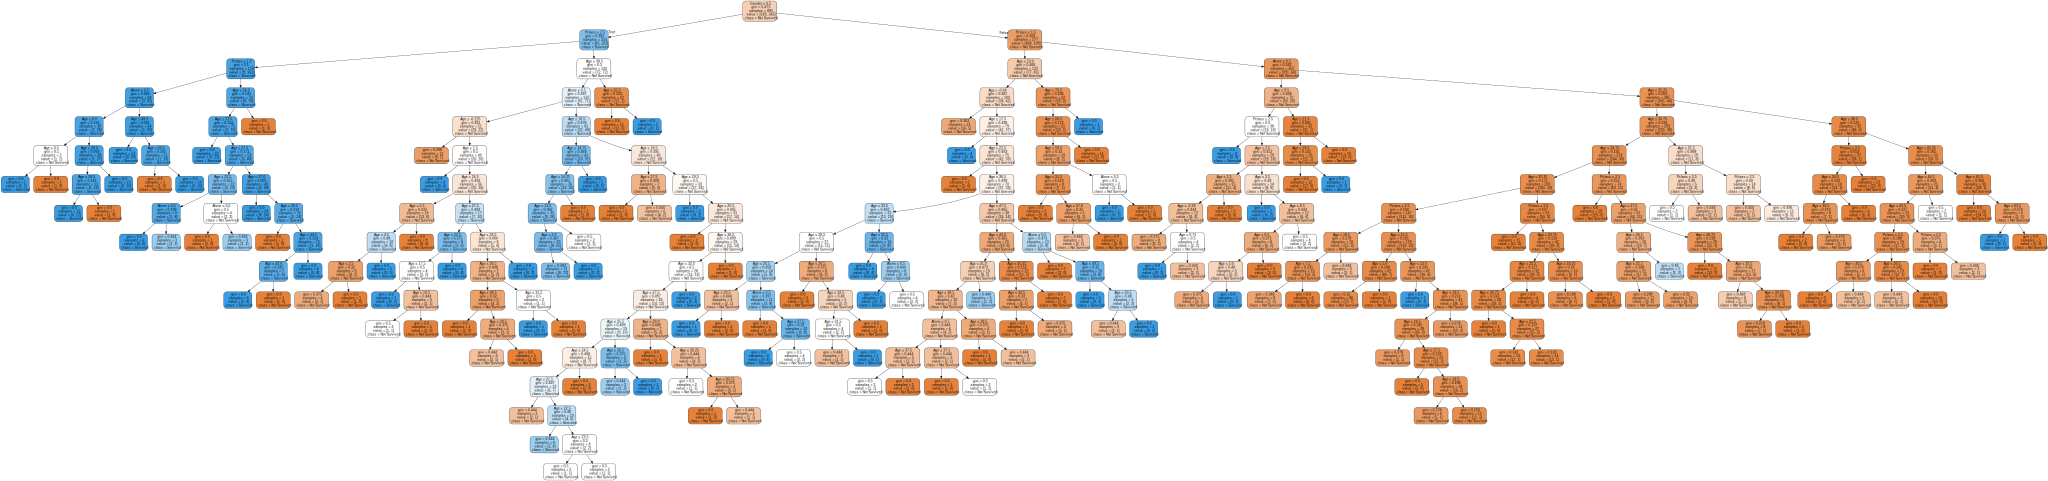

In [112]:
# Визуализация дерева решений с помощью graphviz
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True, special_characters=True)


graph = graphviz.Source(dot_data)
graph

**Общий вывод:**

1. Чаще выживают одикокие. Размер семьи влияет на выживаемость обратно пропоруионально.
2. Чаще выживают женщины
3. Класс каюты влияет прямопропорционально, чем выже класс каюты (дороже), тем выше выживаемость
4. Возраст на выживаемость влиет не сильно